In [1]:
#Lets import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#lets load dataset to pandas dataframe
bike = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\bike.csv")

In [3]:
#print the first 5 rows of dataset
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
bike.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17378,17379,12/31/2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


In [5]:
#total no of rows & columns
bike.shape

(17379, 15)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [7]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [8]:
#finding null values in dataset
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
# Lets rename the columns 'weathersit','yr','mnth','hr','hum','cnt'
bike = bike.rename(columns={
                   'weathersit':'Weather',
                    'yr':'Year',
                    'mnth':'Month',
                    'hum':'Humidity',
                    'cnt':'Count'
})

In [11]:
bike.head()

,instant,dteday,season,Year,Month,hr,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [14]:
#Lets drop instant , dteday and Year as it is not much helpfull
bike.drop(columns= ['instant','dteday','Year'],inplace=True)

In [15]:
bike.head()

,season,Month,hr,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


### Data Visualization

<AxesSubplot:xlabel='hr', ylabel='Count'>

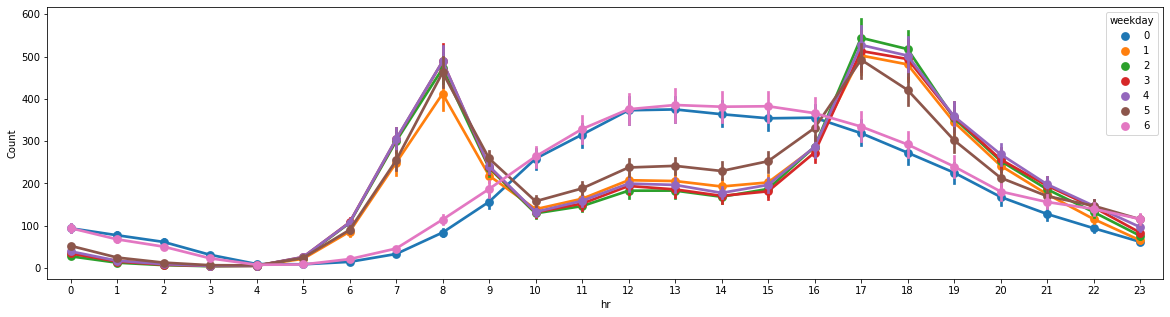

In [18]:
plt.figure(figsize=(20,5))
sns.pointplot(data=bike, x='hr',y='Count',hue='weekday')

<AxesSubplot:xlabel='hr', ylabel='holiday'>

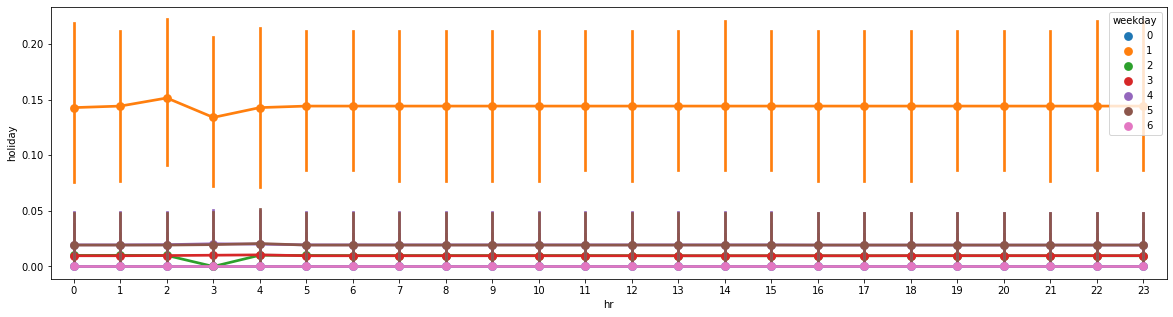

In [20]:
plt.figure(figsize=(20,5))
sns.pointplot(data=bike, x ='hr', y = 'holiday', hue='weekday')

<AxesSubplot:xlabel='Month', ylabel='Count'>

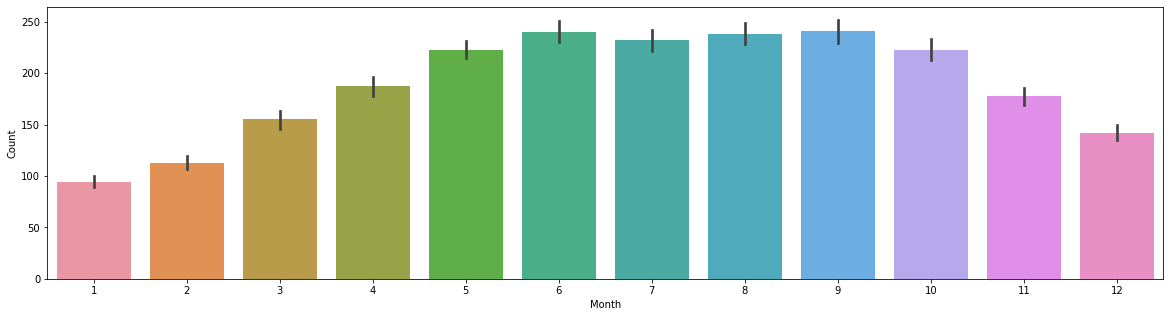

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(data=bike,x='Month',y='Count')

<AxesSubplot:xlabel='weekday', ylabel='Count'>

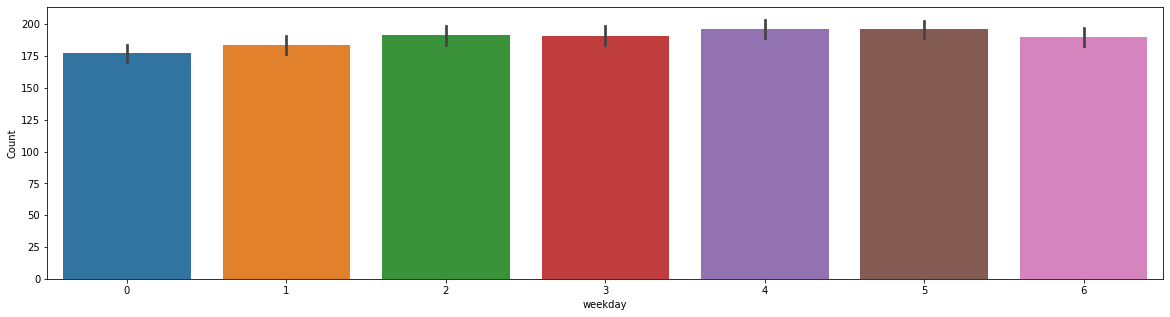

In [23]:
plt.figure(figsize=(20,5))
sns.barplot(data=bike, x='weekday', y='Count')

### Correlation

<AxesSubplot:>

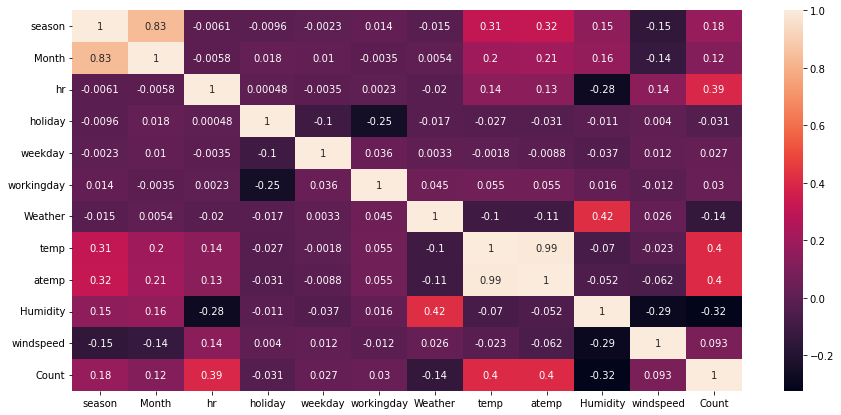

In [24]:
corr = bike.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, annot_kws={'size':10})

### One Hot Encoding

In [25]:
pd.get_dummies(bike['season'],prefix='season',drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [31]:
bike_oh = bike

def one_hot_encoding(data,column):
    data = pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)], axis=1)
    data = data.drop([column],axis=1)
    return data

cols = ['season','Month','hr','holiday','weekday','workingday','Weather']
        
    
for i in cols:
    bike_oh = one_hot_encoding(bike_oh,i)
        

In [32]:
bike_oh.head()

,temp,atemp,Humidity,windspeed,Count,season_2,season_3,season_4,Month_2,Month_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,Weather_2,Weather_3,Weather_4
0,0.24,0.2879,0.81,0.0,16,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,32,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Separating feature and target

In [34]:
X = bike_oh.drop(columns=['atemp', 'windspeed', 'Count'], axis=1)
Y = bike_oh['Count']
                          

In [36]:
print(X)

       temp  Humidity  season_2  season_3  season_4  Month_2  Month_3  \
0      0.24      0.81         0         0         0        0        0   
1      0.22      0.80         0         0         0        0        0   
2      0.22      0.80         0         0         0        0        0   
3      0.24      0.75         0         0         0        0        0   
4      0.24      0.75         0         0         0        0        0   
...     ...       ...       ...       ...       ...      ...      ...   
17374  0.26      0.60         0         0         0        0        0   
17375  0.26      0.60         0         0         0        0        0   
17376  0.26      0.60         0         0         0        0        0   
17377  0.26      0.56         0         0         0        0        0   
17378  0.26      0.65         0         0         0        0        0   

       Month_4  Month_5  Month_6  ...  weekday_1  weekday_2  weekday_3  \
0            0        0        0  ...          0 

In [37]:
print(Y)

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: Count, Length: 17379, dtype: int64


###  Model Evaluation

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(17379, 50) (13903, 50) (3476, 50)


In [57]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [63]:
model.fit(X_train,Y_train)

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
from sklearn import model_selection

In [69]:
def train(model):
    
    kfold = model_selection.KFold(n_splits=5)
    predict =model_selection.cross_val_score(model,X,Y,cv=kfold, scoring ='neg_mean_squared_error')
    cv_score=predict.mean()
    print('Model:',model)
    print('CV score:',abs(cv_score))

In [70]:
for model in models:
    train(model)

Model: LogisticRegression(max_iter=1000)
CV score: 25741.042155756637
Model: SVC(kernel='linear')
CV score: 23232.269558410808
Model: KNeighborsClassifier()
CV score: 41605.47710354248
Model: RandomForestClassifier()
CV score: 17120.640412365163
